STEP 7&8

In [1]:
#coding=utf-8
#import
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder \
    .appName("xiyuanye").master("local[*]")\
            .config('spark.driver.maxResultsSize', '0').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/09 09:01:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df_spark = spark.read.csv("dataset_base.csv",header=True,)

In [4]:
df_spark.show()

+---+------+------+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+----+-----+--------+
|age|height|weight|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|alco|smoke|exercise|
+---+------+------+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+----+-----+--------+
| 52|   175|    75|  1|  0|     125| 212|  0|      1|    168|    0|      1|    2|  2|   3|     0|   0|    0|       1|
| 53|   178|    75|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|   0|    0|       0|
| 70|   167|    68|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|   0|    0|       0|
| 61|   165|    63|  1|  0|     148| 203|  0|      1|    161|    0|      0|    2|  1|   3|     0|   0|    0|       1|
| 62|   163|    55|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|   0|    1|       0|
| 58|   165|    64|  0|  0|     100| 248|  0|      0|   

In [5]:
df_spark.columns

['age',
 'height',
 'weight',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'alco',
 'smoke',
 'exercise']

In [6]:
from pyspark.sql.types import DoubleType

for i in df_spark.columns:
    df_spark = df_spark.withColumn(i, df_spark[i].cast(DoubleType()))

In [7]:
df_spark = df_spark.na.fill( value= 0)

In [8]:
from pyspark.sql import functions as F

In [9]:
def age(text):
    if text < 32 :
        return int(0)
    elif text < 47 :
        return int(1)
    elif text < 70 :
        return int(2)
    else   :
        return int(3)

In [10]:
df_spark = df_spark.withColumn('age', F.UserDefinedFunction(age) (df_spark.age))

In [11]:
df_spark = df_spark.withColumn("age", df_spark["age"].cast(DoubleType()))

In [12]:
df_spark.head(3)

[Row(age=2.0, height=175.0, weight=75.0, sex=1.0, cp=0.0, trestbps=125.0, chol=212.0, fbs=0.0, restecg=1.0, thalach=168.0, exang=0.0, oldpeak=1.0, slope=2.0, ca=2.0, thal=3.0, target=0.0, alco=0.0, smoke=0.0, exercise=1.0),
 Row(age=2.0, height=178.0, weight=75.0, sex=1.0, cp=0.0, trestbps=140.0, chol=203.0, fbs=1.0, restecg=0.0, thalach=155.0, exang=1.0, oldpeak=3.1, slope=0.0, ca=0.0, thal=3.0, target=0.0, alco=0.0, smoke=0.0, exercise=0.0),
 Row(age=3.0, height=167.0, weight=68.0, sex=1.0, cp=0.0, trestbps=145.0, chol=174.0, fbs=0.0, restecg=1.0, thalach=125.0, exang=1.0, oldpeak=2.6, slope=0.0, ca=0.0, thal=3.0, target=0.0, alco=0.0, smoke=0.0, exercise=0.0)]

In [13]:
df_spark.dtypes

[('age', 'double'),
 ('height', 'double'),
 ('weight', 'double'),
 ('sex', 'double'),
 ('cp', 'double'),
 ('trestbps', 'double'),
 ('chol', 'double'),
 ('fbs', 'double'),
 ('restecg', 'double'),
 ('thalach', 'double'),
 ('exang', 'double'),
 ('oldpeak', 'double'),
 ('slope', 'double'),
 ('ca', 'double'),
 ('thal', 'double'),
 ('target', 'double'),
 ('alco', 'double'),
 ('smoke', 'double'),
 ('exercise', 'double')]

In [14]:
df_spark.columns

['age',
 'height',
 'weight',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'alco',
 'smoke',
 'exercise']

In [15]:
from pyspark.ml.feature import MinMaxScaler ,StandardScaler,VectorAssembler,Normalizer
VectorAssembler = VectorAssembler(inputCols=['age',
 'height',
 'weight',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'alco',
 'smoke',
 'exercise'  ],outputCol='features' )
df_spark=VectorAssembler.transform(df_spark)

In [16]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
 
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(df_spark)

In [17]:
(dftrain, dftest) = df_spark.randomSplit([0.7, 0.3],seed=3)

In [18]:
dt = DecisionTreeClassifier(featuresCol="indexedFeatures",labelCol='target')

In [19]:
pipeline = Pipeline(stages=[featureIndexer, dt])

In [20]:
model = pipeline.fit(dftrain)

22/10/09 09:02:04 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [21]:
dftest = model.transform(dftest)
dftrain = model.transform(dftrain)
df_spark.show(2)

+---+------+------+---+---+--------+-----+---+-------+-------+-----+-------+-----+---+----+------+----+-----+--------+--------------------+
|age|height|weight|sex| cp|trestbps| chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|alco|smoke|exercise|            features|
+---+------+------+---+---+--------+-----+---+-------+-------+-----+-------+-----+---+----+------+----+-----+--------+--------------------+
|2.0| 175.0|  75.0|1.0|0.0|   125.0|212.0|0.0|    1.0|  168.0|  0.0|    1.0|  2.0|2.0| 3.0|   0.0| 0.0|  0.0|     1.0|[2.0,175.0,75.0,1...|
|2.0| 178.0|  75.0|1.0|0.0|   140.0|203.0|1.0|    0.0|  155.0|  1.0|    3.1|  0.0|0.0| 3.0|   0.0| 0.0|  0.0|     0.0|[2.0,178.0,75.0,1...|
+---+------+------+---+---+--------+-----+---+-------+-------+-----+-------+-----+---+----+------+----+-----+--------+--------------------+
only showing top 2 rows



In [22]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.metrics import  ConfusionMatrixDisplay
import numpy as np

Training set confusion matrix:
402 414
82 106


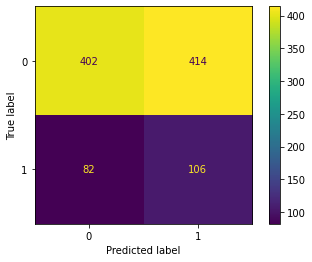

Test set confusion matrix:
183 174
68 70


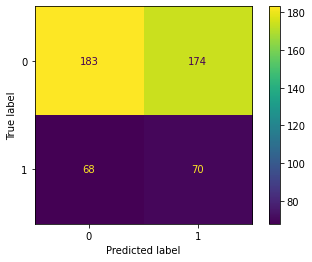

In [24]:
tp = dftrain[(dftrain.prediction == 1) & (dftrain.target == 1)].count()
tn = dftrain[(dftrain.prediction == 0) & (dftrain.target == 0)].count()
fn = dftrain[(dftrain.prediction == 0) & (dftrain.target == 1)].count()
fp = dftrain[(dftrain.prediction == 1) & (dftrain.target == 0)].count()
print("Training set confusion matrix:")
print(tp,tn)
print(fp,fn)
ConfusionMatrixDisplay(np.array([[tp,tn],[fp,fn]])).plot() 
plt.show()

tp = dftest[(dftest.prediction == 1) & (dftest.target == 1)].count()
tn = dftest[(dftest.prediction == 0) & (dftest.target == 0)].count()
fn = dftest[(dftest.prediction == 0) & (dftest.target == 1)].count()
fp = dftest[(dftest.prediction == 1) & (dftest.target == 0)].count()
print("Test set confusion matrix:")
print(tp,tn)
print(fp,fn)
ConfusionMatrixDisplay(np.array([[tp,tn],[fp,fn]])).plot() 
plt.show()

In [25]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter,
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2,
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Training set ROC


Test set ROC


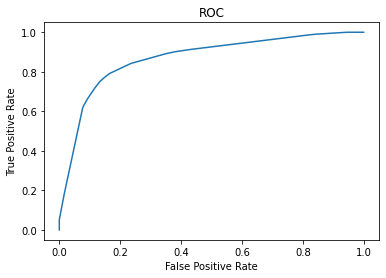

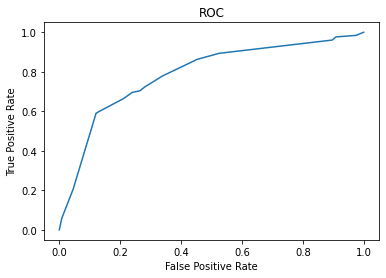

In [26]:
import matplotlib.pyplot as plt


preds = dftrain.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
# Returns as a list (false positive rate, true positive rate)
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
print("Training set ROC")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(x_val, y_val)


preds = dftest.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
# Returns as a list (false positive rate, true positive rate)
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
print("Test set ROC")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(x_val, y_val)


In [29]:
#ACCURACY
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="accuracy")

print('TRAIN set accuracy: %.6f' %evaluator_acc.evaluate(dftrain))
print('TEST set accuracy: %.6f' %evaluator_acc.evaluate(dftest))

TRAIN set accuracy: 0.812749
TEST set accuracy: 0.721212


In [30]:
#F1
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="f1")

print('TRAIN set F1: %.6f' %evaluator_acc.evaluate(dftrain))
print('TEST set F1: %.6f' %evaluator_acc.evaluate(dftest))

TRAIN set F1: 0.812695
TEST set F1: 0.721233


In [31]:
#recallByLabel
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="recallByLabel")

print('TRAIN set recallByLabel : %.6f' %evaluator_acc.evaluate(dftrain))
print('TEST set recallByLabel : %.6f' %evaluator_acc.evaluate(dftest))

TRAIN set recallByLabel : 0.834677
TEST set recallByLabel : 0.719008


In [32]:
#precisionByLabel
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="precisionByLabel")

print('TRAIN set precisionByLabel : %.6f' %evaluator_acc.evaluate(dftrain))
print('TEST set precisionByLabel : %.6f' %evaluator_acc.evaluate(dftest))

TRAIN set precisionByLabel : 0.796154
TEST set precisionByLabel : 0.713115


In [33]:
for i in range(5,15):
    (dftrain, dftest) = df_spark.randomSplit([0.7, 0.3],seed=3)
    dt = DecisionTreeClassifier(featuresCol="indexedFeatures",labelCol='target',maxDepth=i)
    pipeline = Pipeline(stages=[featureIndexer, dt])
    model = pipeline.fit(dftrain)
    dftest = model.transform(dftest)
    dftrain = model.transform(dftrain)
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="accuracy")
    print(" maxDepth: int = " , i)
    print('train accuracy: %.6f' %evaluator_acc.evaluate(dftrain))
    print('test accuracy: %.6f' %evaluator_acc.evaluate(dftest))
    print("")

 maxDepth: int =  5
train accuracy: 0.812749
test accuracy: 0.721212

 maxDepth: int =  6
train accuracy: 0.848606
test accuracy: 0.737374

 maxDepth: int =  7
train accuracy: 0.904382
test accuracy: 0.737374

 maxDepth: int =  8
train accuracy: 0.944223
test accuracy: 0.751515

 maxDepth: int =  9
train accuracy: 0.969124
test accuracy: 0.783838

 maxDepth: int =  10
train accuracy: 0.988048
test accuracy: 0.800000

 maxDepth: int =  11
train accuracy: 0.999004
test accuracy: 0.804040

 maxDepth: int =  12
train accuracy: 0.999004
test accuracy: 0.804040

 maxDepth: int =  13
train accuracy: 1.000000
test accuracy: 0.802020

 maxDepth: int =  14
train accuracy: 1.000000
test accuracy: 0.802020



In [35]:
from pyspark.ml.classification import RandomForestClassifier
for i in range(5,15):
    (dftrain, dftest) = df_spark.randomSplit([0.7, 0.3],seed=3)
    dt = RandomForestClassifier(featuresCol="indexedFeatures",labelCol='target',maxDepth=i)
    pipeline = Pipeline(stages=[featureIndexer, dt])
    model = pipeline.fit(dftrain)
    dftest = model.transform(dftest)
    dftrain = model.transform(dftrain)
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="accuracy")
    print(" maxDepth: int = " , i)
    print('train accuracy: %.6f' %evaluator_acc.evaluate(dftrain))
    print('test accuracy: %.6f' %evaluator_acc.evaluate(dftest))
    print("")

 maxDepth: int =  5
train accuracy: 0.822709
test accuracy: 0.739394

 maxDepth: int =  6
train accuracy: 0.879482
test accuracy: 0.751515

 maxDepth: int =  7
train accuracy: 0.933267
test accuracy: 0.783838

 maxDepth: int =  8
train accuracy: 0.959163
test accuracy: 0.795960

 maxDepth: int =  9
train accuracy: 0.989044
test accuracy: 0.820202

 maxDepth: int =  10
train accuracy: 0.995020
test accuracy: 0.820202

 maxDepth: int =  11
train accuracy: 0.995020
test accuracy: 0.832323

 maxDepth: int =  12
train accuracy: 0.995020
test accuracy: 0.822222

 maxDepth: int =  13
train accuracy: 0.996016
test accuracy: 0.830303

 maxDepth: int =  14
train accuracy: 0.996016
test accuracy: 0.830303



Train：
402 414
82 106


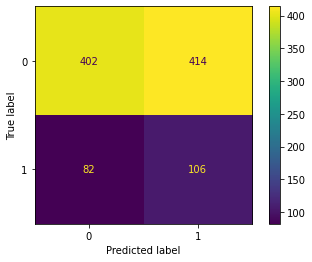

Test：
183 174
68 70


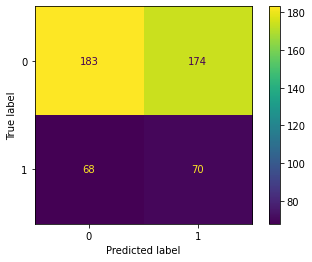

 maxDepth: int =  5
train set accuracy: 0.812749
test set accuracy: 0.721212
train f1: 0.812695
test f1: 0.721233
train recallByLabel : 0.834677
test recallByLabel : 0.719008
train precisionByLabel : 0.796154
test precisionByLabel : 0.713115


train roc


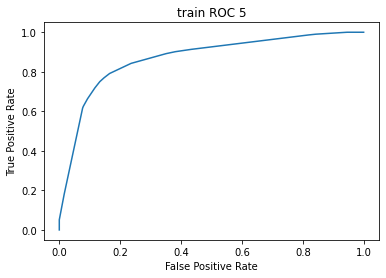

test roc


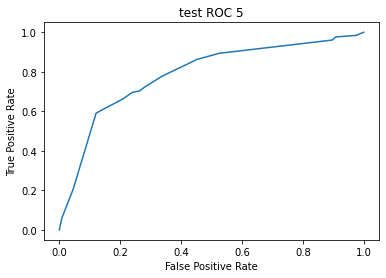


Train：
426 426
70 82


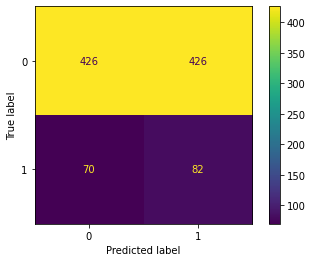

Test：
187 178
64 66


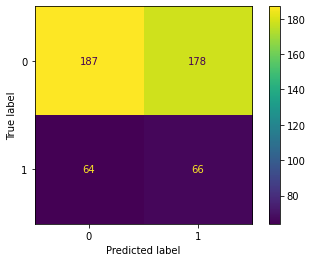

 maxDepth: int =  6
train set accuracy: 0.848606
test set accuracy: 0.737374
train f1: 0.848606
test f1: 0.737393
train recallByLabel : 0.858871
test recallByLabel : 0.735537
train precisionByLabel : 0.838583
test precisionByLabel : 0.729508


train roc


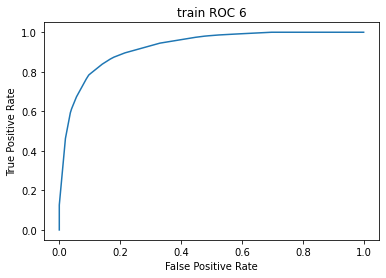

test roc


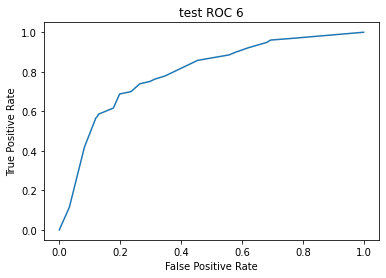


Train：
460 448
48 48


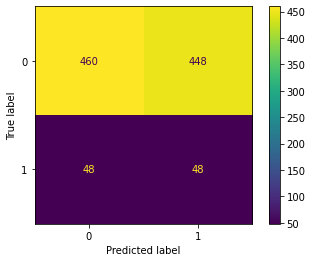

Test：
182 183
59 71


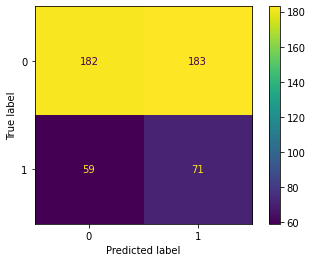

 maxDepth: int =  7
train set accuracy: 0.904382
test set accuracy: 0.737374
train f1: 0.904382
test f1: 0.737361
train recallByLabel : 0.903226
test recallByLabel : 0.756198
train precisionByLabel : 0.903226
test precisionByLabel : 0.720472
train roc


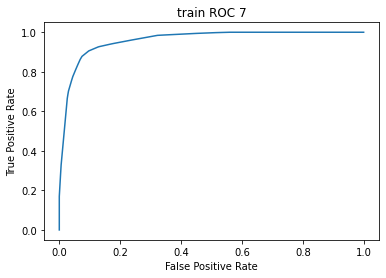

test roc


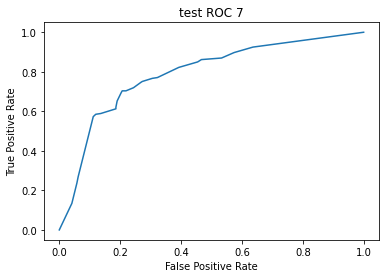


Train：
472 476
20 36


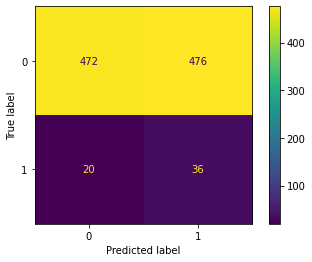

Test：
180 192
50 73


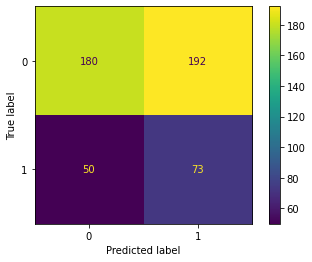

 maxDepth: int =  8
train set accuracy: 0.944223
test set accuracy: 0.751515
train f1: 0.944220
test f1: 0.751235
train recallByLabel : 0.959677
test recallByLabel : 0.793388
train precisionByLabel : 0.929688
test precisionByLabel : 0.724528
train roc


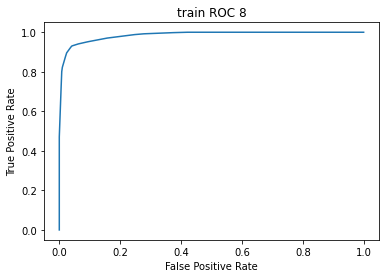

test roc


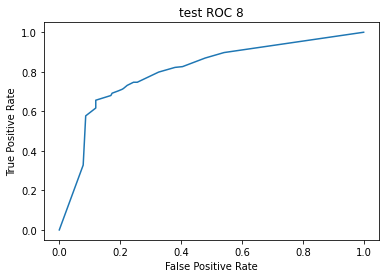


Train：
489 484
12 19


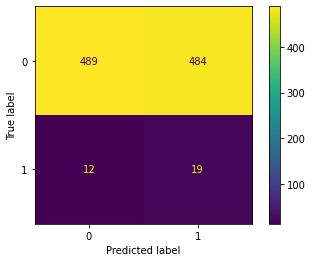

Test：
193 195
47 60


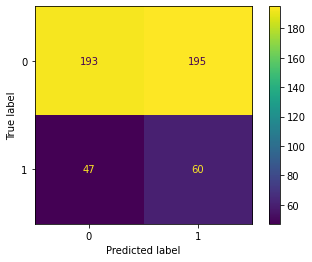

 maxDepth: int =  9
train set accuracy: 0.969124
test set accuracy: 0.783838
train f1: 0.969125
test f1: 0.783815
train recallByLabel : 0.975806
test recallByLabel : 0.805785
train precisionByLabel : 0.962227
test precisionByLabel : 0.764706
train roc


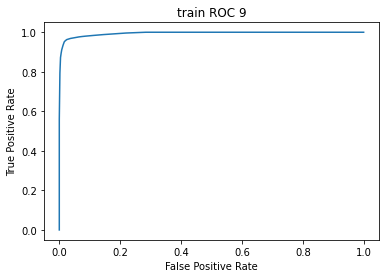

test roc


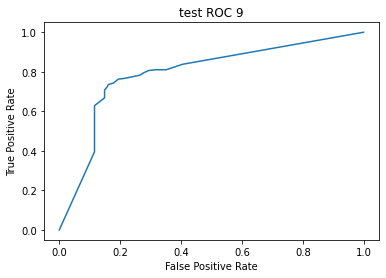


Train：
498 494
2 10


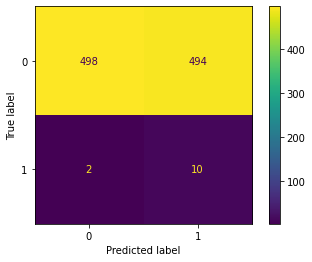

Test：
196 200
42 57


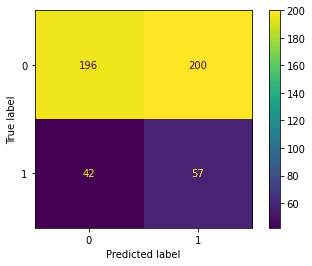

 maxDepth: int =  10
train set accuracy: 0.988048
test set accuracy: 0.800000
train f1: 0.988048
test f1: 0.799951
train recallByLabel : 0.995968
test recallByLabel : 0.826446
train precisionByLabel : 0.980159
test precisionByLabel : 0.778210
train roc


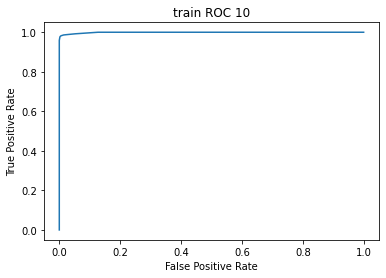

test roc


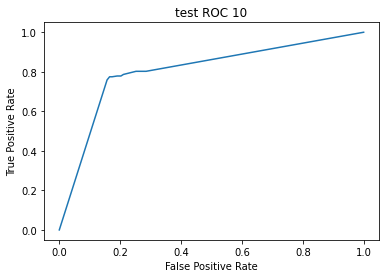


Train：
507 496
0 1


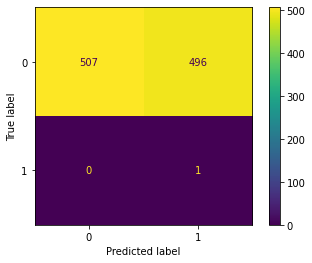

Test：
200 198
44 53


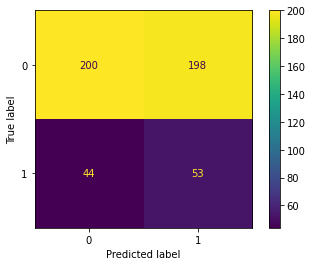

 maxDepth: int =  11
train set accuracy: 0.999004
test set accuracy: 0.804040
train f1: 0.999004
test f1: 0.804055
train recallByLabel : 1.000000
test recallByLabel : 0.818182
train precisionByLabel : 0.997988
test precisionByLabel : 0.788845
train roc


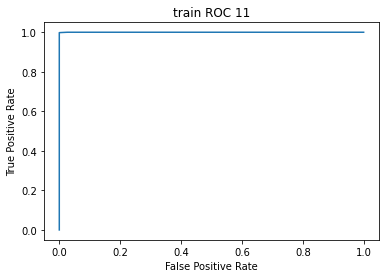

test roc


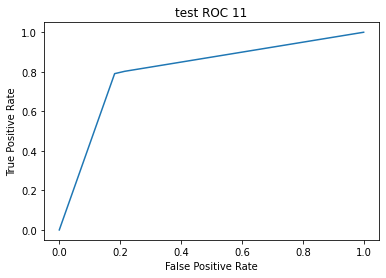


Train：
507 496
0 1


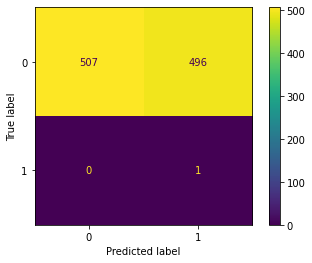

Test：
200 198
44 53


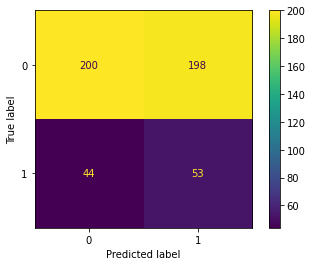

 maxDepth: int =  12
train set accuracy: 0.999004
test set accuracy: 0.804040
train f1: 0.999004
test f1: 0.804055
train recallByLabel : 1.000000
test recallByLabel : 0.818182
train precisionByLabel : 0.997988
test precisionByLabel : 0.788845
train roc


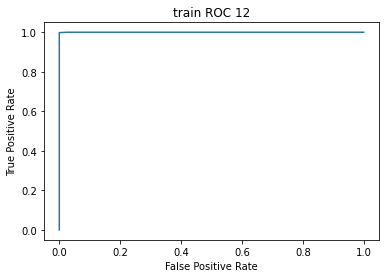

test roc


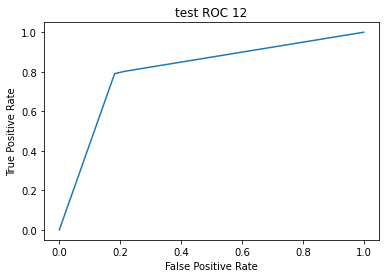


Train：
508 496
0 0


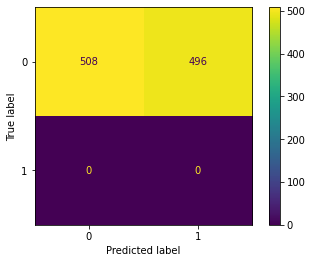

Test：
200 197
45 53


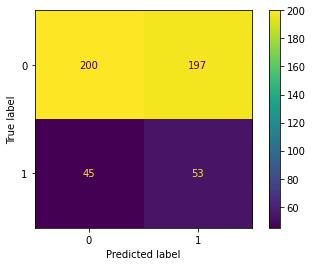

 maxDepth: int =  13
train set accuracy: 1.000000
test set accuracy: 0.802020
train f1: 1.000000
test f1: 0.802040
train recallByLabel : 1.000000
test recallByLabel : 0.814050
train precisionByLabel : 1.000000
test precisionByLabel : 0.788000
train roc


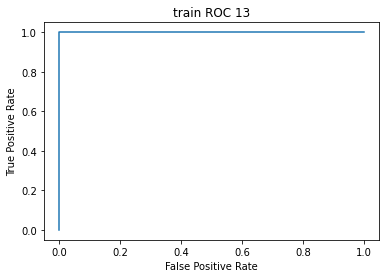

test roc


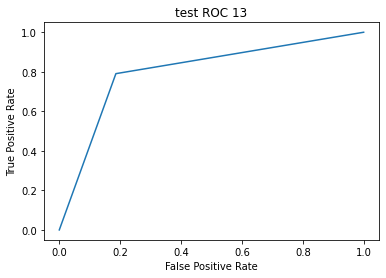


Train：
508 496
0 0


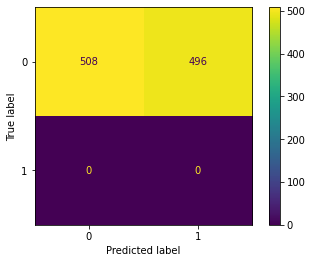

Test：
200 197
45 53


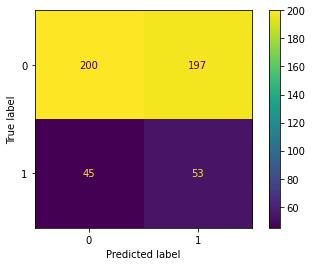

 maxDepth: int =  14
train set accuracy: 1.000000
test set accuracy: 0.802020
train f1: 1.000000
test f1: 0.802040
train recallByLabel : 1.000000
test recallByLabel : 0.814050
train precisionByLabel : 1.000000
test precisionByLabel : 0.788000
train roc


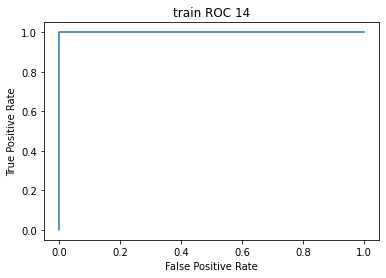

test roc


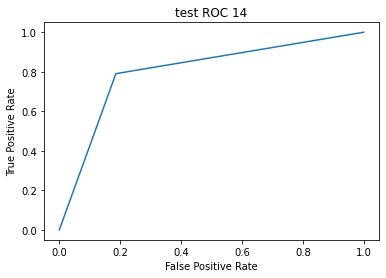

In [36]:
#Cyclic parameter calculation model
for i in range(5,15):
    # Data set partitioning
    (dftrain, dftest) = df_spark.randomSplit([0.7, 0.3],seed=3)
    # Use the decision tree model
    dt = DecisionTreeClassifier(featuresCol="indexedFeatures",labelCol='target',maxDepth=i)
    # Building a pipeline
    pipeline = Pipeline(stages=[featureIndexer, dt])
    # Training assembly line
    model = pipeline.fit(dftrain)
    # To make predictions
    dftest = model.transform(dftest)
    dftrain = model.transform(dftrain)
    
    #Confusion matrix
    tp = dftrain[(dftrain.prediction == 1) & (dftrain.target == 1)].count()
    tn = dftrain[(dftrain.prediction == 0) & (dftrain.target == 0)].count()
    fn = dftrain[(dftrain.prediction == 0) & (dftrain.target == 1)].count()
    fp = dftrain[(dftrain.prediction == 1) & (dftrain.target == 0)].count()
    print("Train：")
    print(tp,tn)
    print(fp,fn)
    ConfusionMatrixDisplay(np.array([[tp,tn],[fp,fn]])).plot() 
    plt.show()
    
    
    tp = dftest[(dftest.prediction == 1) & (dftest.target == 1)].count()
    tn = dftest[(dftest.prediction == 0) & (dftest.target == 0)].count()
    fn = dftest[(dftest.prediction == 0) & (dftest.target == 1)].count()
    fp = dftest[(dftest.prediction == 1) & (dftest.target == 0)].count()
    print("Test：")
    print(tp,tn)
    print(fp,fn) 
    ConfusionMatrixDisplay(np.array([[tp,tn],[fp,fn]])).plot() 
    plt.show()
    
    
    #Models evaluation
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="accuracy")
    print(" maxDepth: int = " , i)
    print('train set accuracy: %.6f' %evaluator_acc.evaluate(dftrain))
    print('test set accuracy: %.6f' %evaluator_acc.evaluate(dftest))
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="f1")
    print('train f1: %.6f' %evaluator_acc.evaluate(dftrain))
    print('test f1: %.6f' %evaluator_acc.evaluate(dftest))
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="recallByLabel")
    print('train recallByLabel : %.6f' %evaluator_acc.evaluate(dftrain))
    print('test recallByLabel : %.6f' %evaluator_acc.evaluate(dftest))
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="precisionByLabel")
    print('train precisionByLabel : %.6f' %evaluator_acc.evaluate(dftrain))
    print('test precisionByLabel : %.6f' %evaluator_acc.evaluate(dftest))
    
    # ROC
    preds = dftrain.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
    # Returns as a list (false positive rate, true positive rate)
    points = CurveMetrics(preds).get_curve('roc')
    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    print("train roc")
    plt.title("train ROC "+  str(i))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(x_val, y_val)
    plt.show()

    preds = dftest.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
    # Returns as a list (false positive rate, true positive rate)
    points = CurveMetrics(preds).get_curve('roc')
    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    print("test roc")
    plt.title("test ROC "+  str(i))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(x_val, y_val)
    plt.show()
    print("")

In [37]:
# Use random forest training
from pyspark.ml.classification import RandomForestClassifier

train Confusion matrix：
405 421
75 103


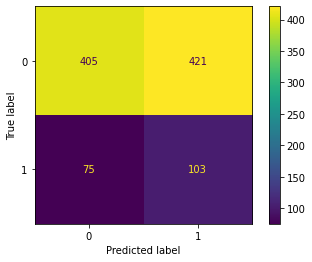

test Confusion matrix：
177 189
53 76


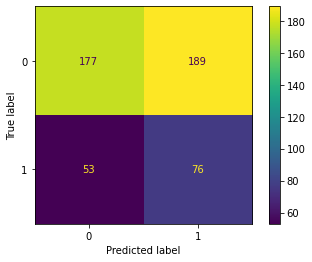

 maxDepth: int =  5
train accuracy: 0.822709
test set accuracy: 0.739394
train set f1: 0.822630
test set f1: 0.739100
train set recallByLabel : 0.848790
test set recallByLabel : 0.780992
train set precisionByLabel : 0.803435
test set precisionByLabel : 0.713208
train roc


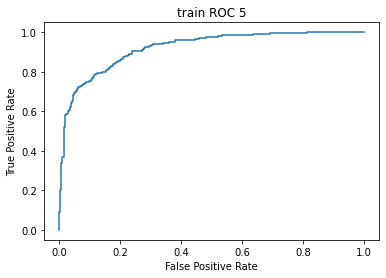

test roc


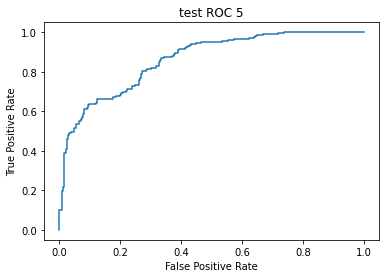


train Confusion matrix：
426 457
39 82


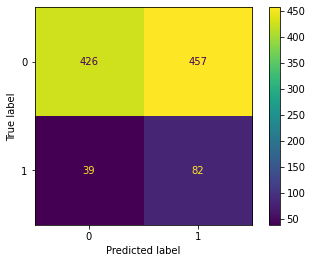

test Confusion matrix：
186 186
56 67


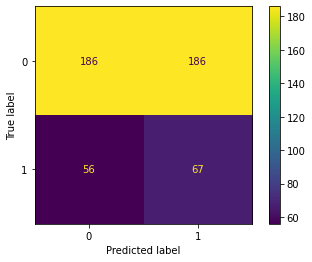

 maxDepth: int =  6
train accuracy: 0.879482
test set accuracy: 0.751515
train set f1: 0.879323
test set f1: 0.751515
train set recallByLabel : 0.921371
test set recallByLabel : 0.768595
train set precisionByLabel : 0.847866
test set precisionByLabel : 0.735178
train roc


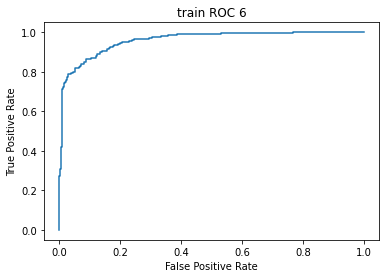

test roc


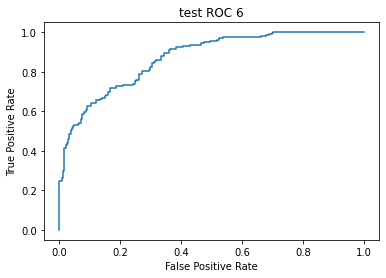


train Confusion matrix：
460 477
19 48


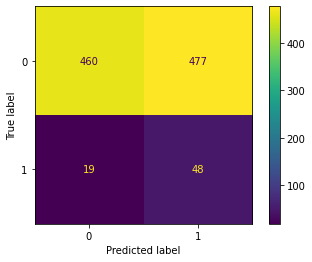

test Confusion matrix：
195 193
49 58


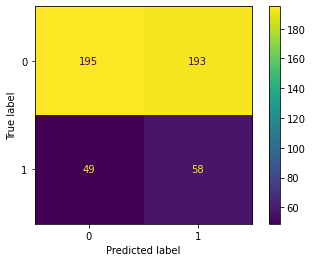

 maxDepth: int =  7
train accuracy: 0.933267
test set accuracy: 0.783838
train set f1: 0.933234
test set f1: 0.783854
train set recallByLabel : 0.961694
test set recallByLabel : 0.797521
train set precisionByLabel : 0.908571
test set precisionByLabel : 0.768924
train roc


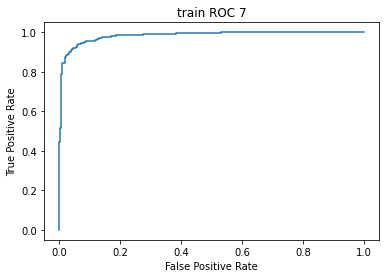

test roc


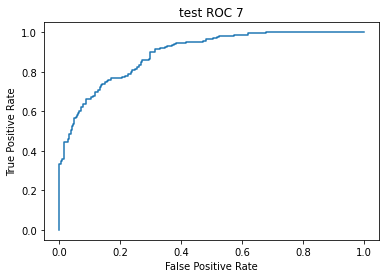


train Confusion matrix：
480 483
13 28


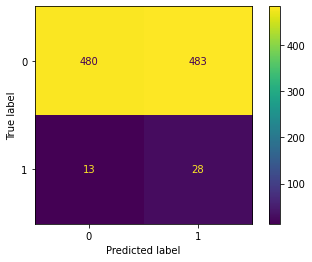

test Confusion matrix：
203 191
51 50


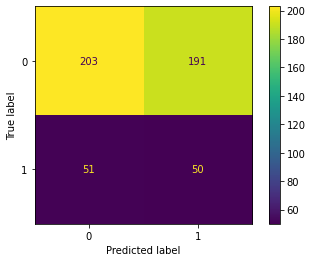

 maxDepth: int =  8
train accuracy: 0.959163
test set accuracy: 0.795960
train set f1: 0.959162
test set f1: 0.795950
train set recallByLabel : 0.973790
test set recallByLabel : 0.789256
train set precisionByLabel : 0.945205
test set precisionByLabel : 0.792531


train roc


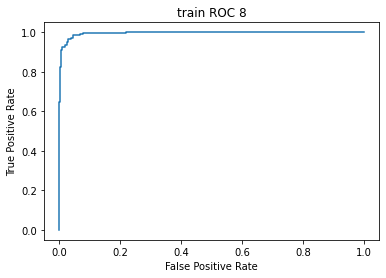

test roc


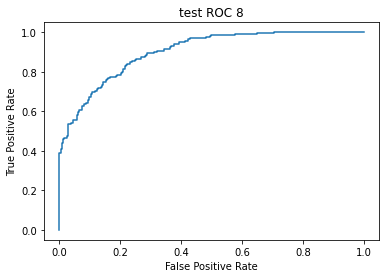


train Confusion matrix：
499 494
2 9


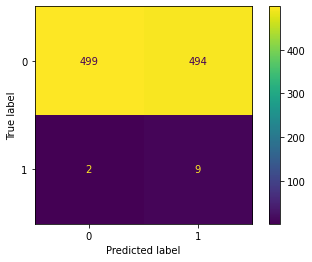

test Confusion matrix：
209 197
45 44


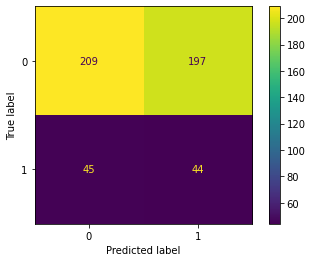

 maxDepth: int =  9
train accuracy: 0.989044
test set accuracy: 0.820202
train set f1: 0.989044
test set f1: 0.820193
train set recallByLabel : 0.995968
test set recallByLabel : 0.814050
train set precisionByLabel : 0.982107
test set precisionByLabel : 0.817427
train roc


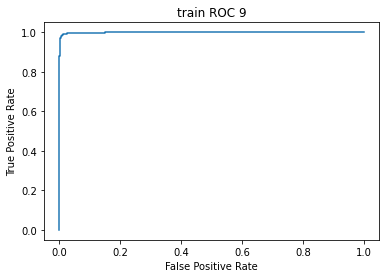

test roc


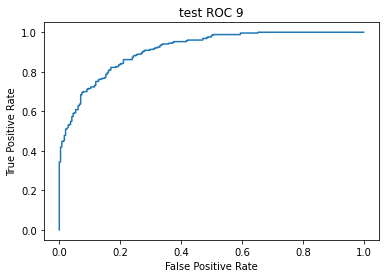


train Confusion matrix：
505 494
2 3


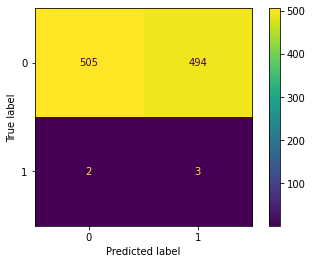

test Confusion matrix：
208 198
44 45


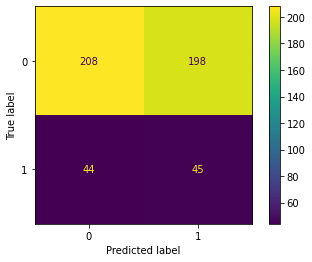

 maxDepth: int =  10
train accuracy: 0.995020
test set accuracy: 0.820202
train set f1: 0.995020
test set f1: 0.820209
train set recallByLabel : 0.995968
test set recallByLabel : 0.818182
train set precisionByLabel : 0.993964
test set precisionByLabel : 0.814815
train roc


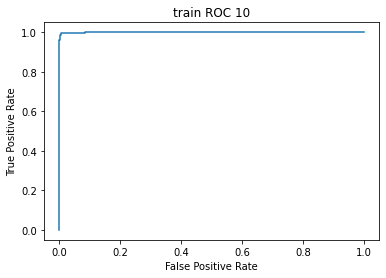

test roc


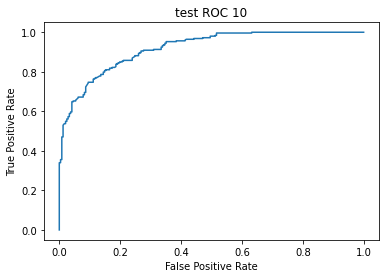


train Confusion matrix：
505 494
2 3


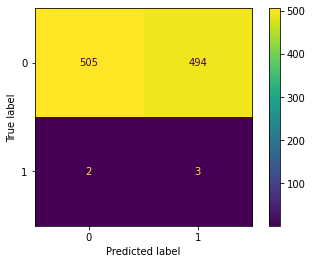

test Confusion matrix：
210 202
40 43


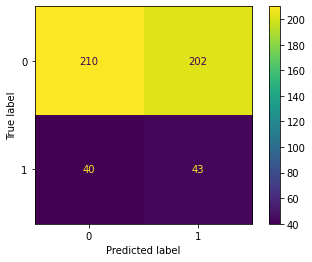

 maxDepth: int =  11
train accuracy: 0.995020
test set accuracy: 0.832323
train set f1: 0.995020
test set f1: 0.832340
train set recallByLabel : 0.995968
test set recallByLabel : 0.834711
train set precisionByLabel : 0.993964
test set precisionByLabel : 0.824490
train roc


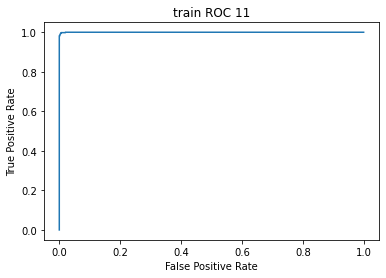

test roc


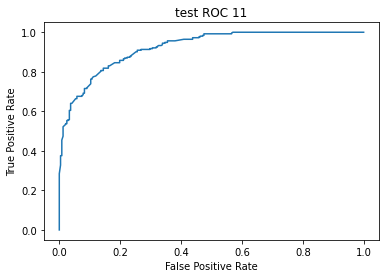


train Confusion matrix：
505 494
2 3


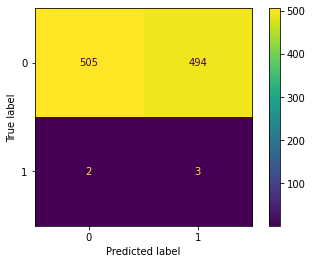

test Confusion matrix：
206 201
41 47


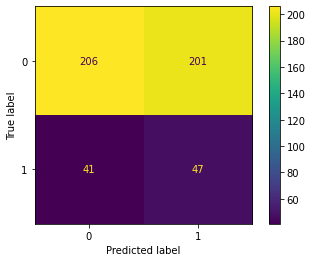

 maxDepth: int =  12
train accuracy: 0.995020
test set accuracy: 0.822222
train set f1: 0.995020
test set f1: 0.822244
train set recallByLabel : 0.995968
test set recallByLabel : 0.830579
train set precisionByLabel : 0.993964
test set precisionByLabel : 0.810484
train roc


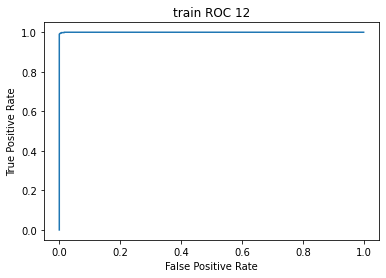

test roc


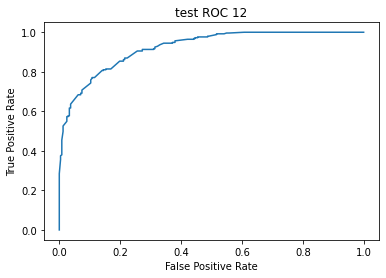


train Confusion matrix：
505 495
1 3


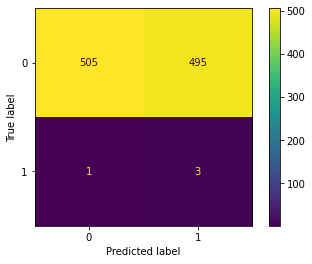

test Confusion matrix：
205 206
36 48


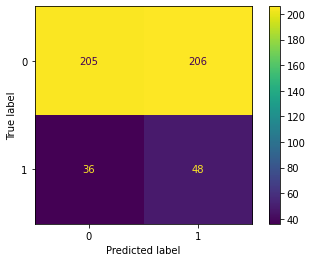

 maxDepth: int =  13
train accuracy: 0.996016
test set accuracy: 0.830303
train set f1: 0.996016
test set f1: 0.830295
train set recallByLabel : 0.997984
test set recallByLabel : 0.851240
train set precisionByLabel : 0.993976
test set precisionByLabel : 0.811024
train roc


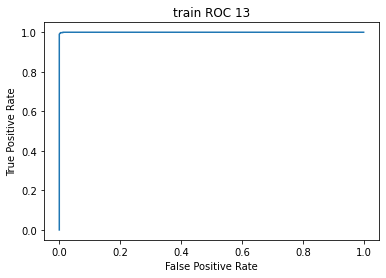

test roc


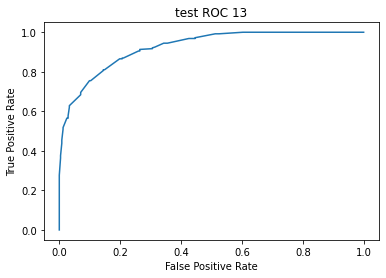


train Confusion matrix：
505 495
1 3


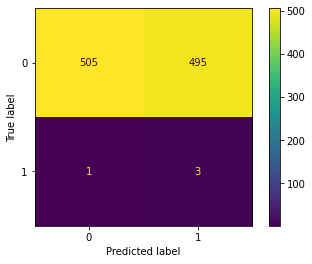

test Confusion matrix：
205 206
36 48


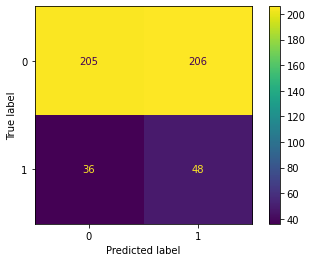

 maxDepth: int =  14
train accuracy: 0.996016
test set accuracy: 0.830303
train set f1: 0.996016
test set f1: 0.830295
train set recallByLabel : 0.997984
test set recallByLabel : 0.851240
train set precisionByLabel : 0.993976
test set precisionByLabel : 0.811024
train roc


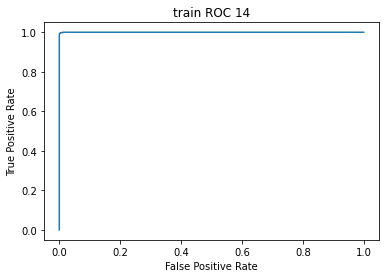

test roc


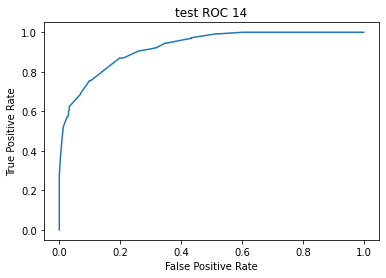

In [38]:
# Cyclic parameter calculation model
for i in range(5,15):
    # Data set partitioning
    (dftrain, dftest) = df_spark.randomSplit([0.7, 0.3],seed=3)
    # Using a random forest model
    dt = RandomForestClassifier(featuresCol="indexedFeatures",labelCol='target',maxDepth=i)
    # Building a pipeline
    pipeline = Pipeline(stages=[featureIndexer, dt])
    # Training assembly line
    model = pipeline.fit(dftrain)
    # To make predictions
    dftest = model.transform(dftest)
    dftrain = model.transform(dftrain)
    
    # Confusion matrix
    tp = dftrain[(dftrain.prediction == 1) & (dftrain.target == 1)].count()
    tn = dftrain[(dftrain.prediction == 0) & (dftrain.target == 0)].count()
    fn = dftrain[(dftrain.prediction == 0) & (dftrain.target == 1)].count()
    fp = dftrain[(dftrain.prediction == 1) & (dftrain.target == 0)].count()
    print("train Confusion matrix：")
    print(tp,tn)
    print(fp,fn)
    ConfusionMatrixDisplay(np.array([[tp,tn],[fp,fn]])).plot() 
    plt.show()
    
    
    tp = dftest[(dftest.prediction == 1) & (dftest.target == 1)].count()
    tn = dftest[(dftest.prediction == 0) & (dftest.target == 0)].count()
    fn = dftest[(dftest.prediction == 0) & (dftest.target == 1)].count()
    fp = dftest[(dftest.prediction == 1) & (dftest.target == 0)].count()
    print("test Confusion matrix：")
    print(tp,tn)
    print(fp,fn) 
    ConfusionMatrixDisplay(np.array([[tp,tn],[fp,fn]])).plot() 
    plt.show()
    
    
    # Model evaluation
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="accuracy")
    print(" maxDepth: int = " , i)
    print('train accuracy: %.6f' %evaluator_acc.evaluate(dftrain))
    print('test set accuracy: %.6f' %evaluator_acc.evaluate(dftest))
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="f1")
    print('train set f1: %.6f' %evaluator_acc.evaluate(dftrain))
    print('test set f1: %.6f' %evaluator_acc.evaluate(dftest))
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="recallByLabel")
    print('train set recallByLabel : %.6f' %evaluator_acc.evaluate(dftrain))
    print('test set recallByLabel : %.6f' %evaluator_acc.evaluate(dftest))
    evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol='target', metricName="precisionByLabel")
    print('train set precisionByLabel : %.6f' %evaluator_acc.evaluate(dftrain))
    print('test set precisionByLabel : %.6f' %evaluator_acc.evaluate(dftest))
    
    
   
    # ROC
    preds = dftrain.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
    # Returns as a list (false positive rate, true positive rate)
    points = CurveMetrics(preds).get_curve('roc')
    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    print("train roc")
    plt.title("train ROC "+ str(i))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(x_val, y_val)
    plt.show()  

    preds = dftest.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
    # Returns as a list (false positive rate, true positive rate)
    points = CurveMetrics(preds).get_curve('roc')
    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    print("test roc")
    plt.title("test ROC "+  str(i))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(x_val, y_val)
    plt.show()
    print("")